In [1]:
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline 
#Load Model
from keras.models import model_from_json
import paths_file


Using Theano backend.
Using gpu device 0: GeForce GTX 980 Ti (CNMeM is disabled, cuDNN 4007)


In [2]:
#Load a existing model architecture
filepath= paths_file.json_models_path + str("Json2016-11-17-BEST.txt")  #CHANGE FILE !!

with open(filepath, 'r') as myfile:
    json_string=myfile.read()
    
model = model_from_json(json_string)


from keras.models import load_model

from kappa_methods import quad_kappa
# model = load_model("/home/maria.alvarez/mountedData/trainedModels/model_2016-11-07 15:50:44")


weights = paths_file.net_weights_path  + str("final_2016-11-17_kappa_test_0.70.hdf5")

#load Weights 
model.load_weights(weights)

In [3]:
import os

testPath = paths_file.test_processed_path
X_test = np.load(os.path.join(testPath, "images_200.npy"))  
y_test = np.load(os.path.join(testPath, "labels_200.npy")) 


In [4]:
model.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 16, 512, 512)  448         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
batchnormalization_1 (BatchNormal(None, 16, 512, 512)  1024        convolution2d_1[0][0]            
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 16, 512, 512)  2320        batchnormalization_1[0][0]       
____________________________________________________________________________________________________
batchnormalization_2 (BatchNormal(None, 16, 512, 512)  1024        convolution2d_2[0][0]            
___________________________________________________________________________________________

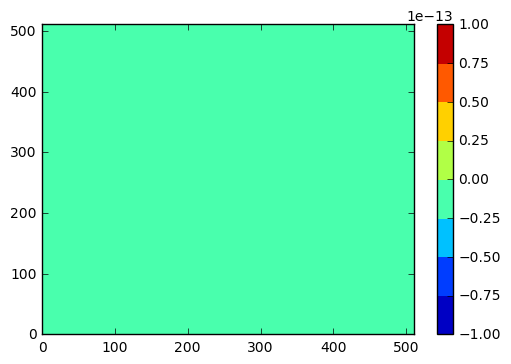

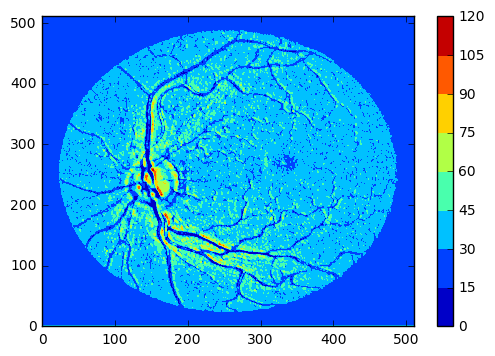

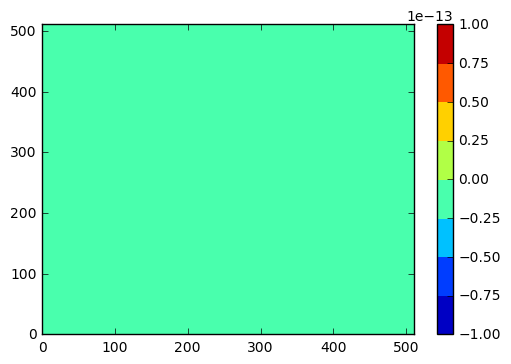

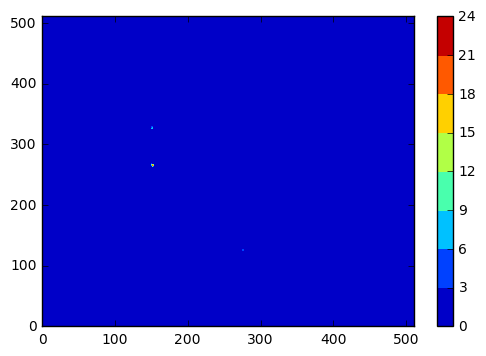

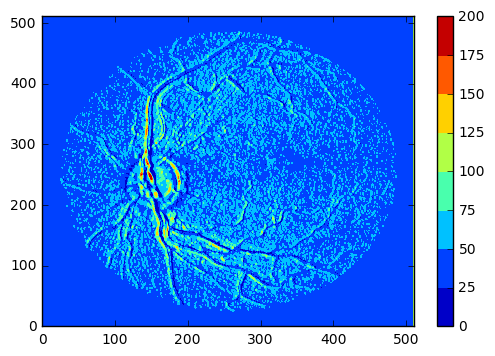

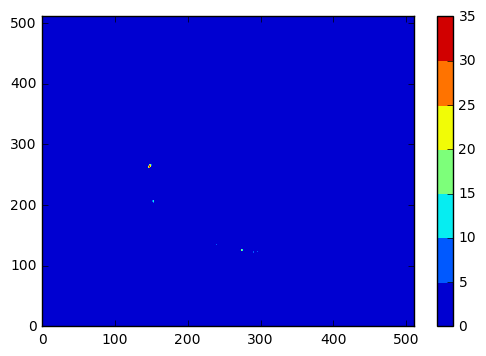

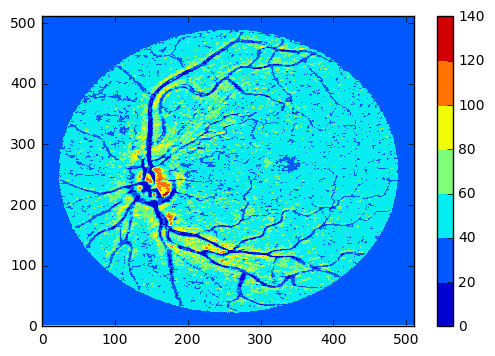

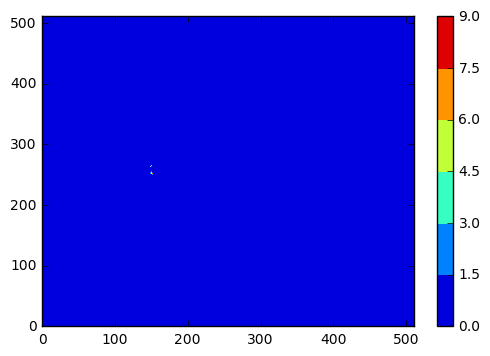

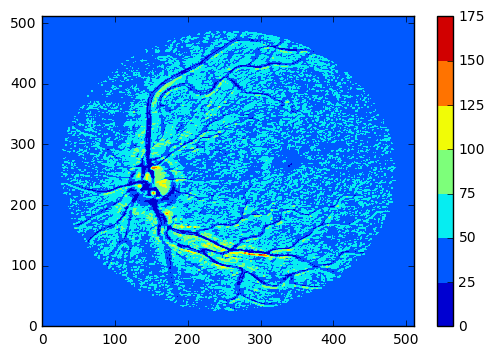

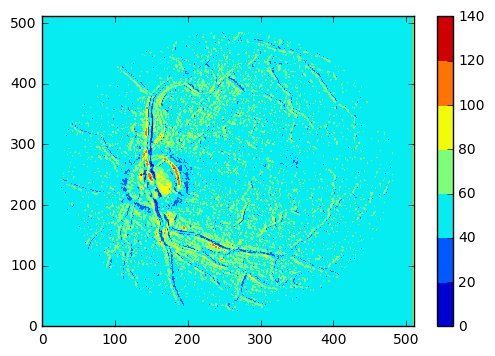

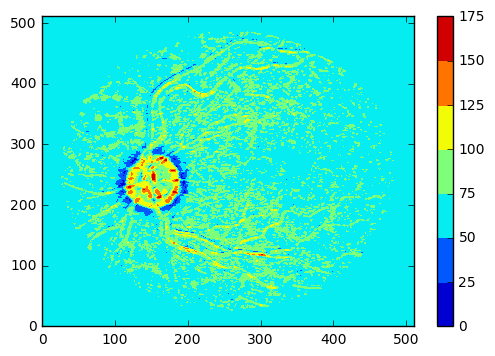

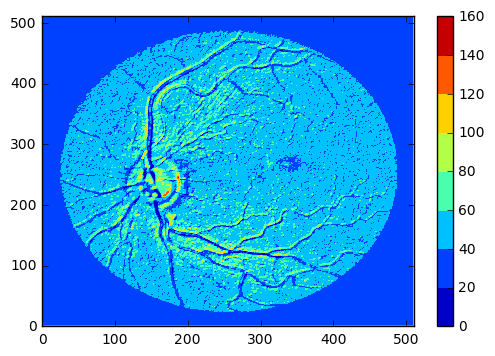

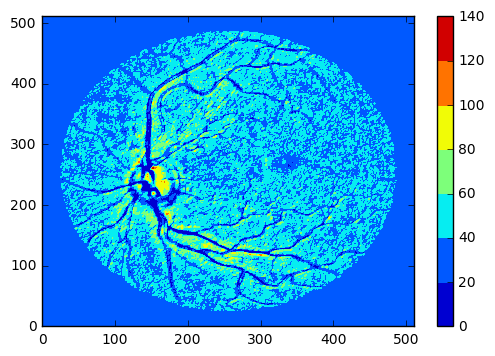

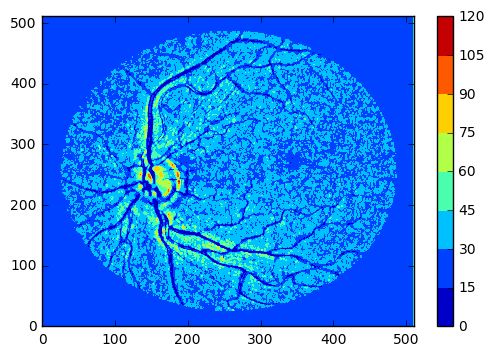

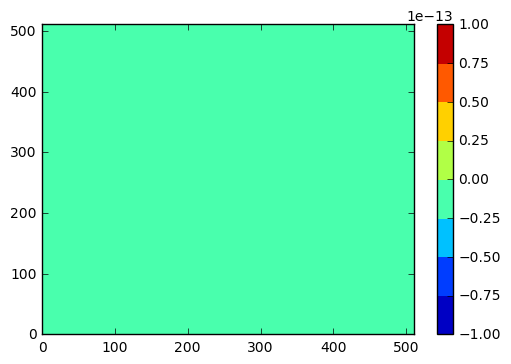

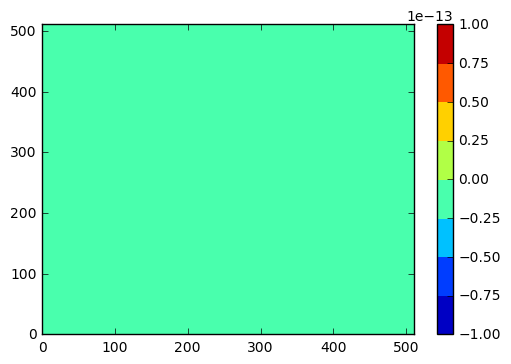

In [8]:
# guided-backpropagation
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x = x.transpose((1, 2, 0))
    return x

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

layer = 0

# this function returns the loss and grads given the input picture
get_acti = K.function([model.layers[0].input, K.learning_phase()], [model.layers[layer].output[:,:,:,:]])

# for pic in IMGS_CLASS[200:240]:
for i in np.arange(1):#X_test.shape[0]):
    #Rotate randomly all the images
    pic = X_test[i]
    
    
    # the input to the network is the original image
    input_img_data = np.expand_dims(pic,axis=0)

    # reconstruct image weighted according to the random forest output
    img = np.zeros((512,512))
    acti = np.squeeze(get_acti([input_img_data,0])[0])
#     for k in range(imp.size):
#         img += imp[k]*cv2.resize(acti[k], (224, 224))

    # plot the resulting image
    
for filters in acti:
    
    plt.contourf(filters)
    plt.colorbar()
    plt.show()